In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [17]:
tip = pd.read_csv('tips.csv')

In [64]:
tip.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587


In [68]:
tip.groupby([tip['day'],tip['time']]).count()

total_bill  tip  sex  smoker  size  tip_rate
day time                                              
0   0             61   61   61      61    61        61
    1              1    1    1       1     1         1
1   0              7    7    7       7     7         7
    1             12   12   12      12    12        12
2   1             87   87   87      87    87        87
3   1             76   76   76      76    76        76

C:\Users\j\anaconda3\envs\multi\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'total_bill'}>,
        <AxesSubplot:title={'center':'tip'}>,
        <AxesSubplot:title={'center':'sex'}>],
       [<AxesSubplot:title={'center':'smoker'}>,
        <AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'time'}>],
       [<AxesSubplot:title={'center':'size'}>,
        <AxesSubplot:title={'center':'tip_rate'}>, <AxesSubplot:>]],
      dtype=object)

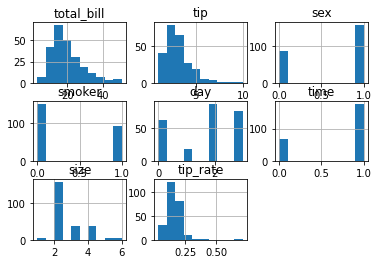

In [70]:
tip.hist()

In [23]:
size=pd.crosstab(index=tip['size'], columns = 'count')

array([[<AxesSubplot:title={'center':'count'}>]], dtype=object)

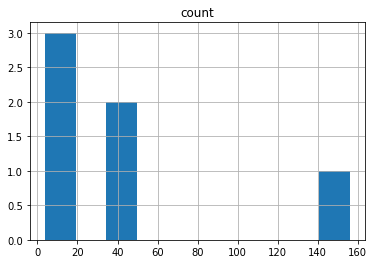

In [71]:
size.hist()

<AxesSubplot:xlabel='size'>

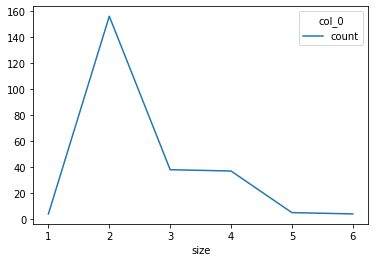

In [72]:
size.plot()

In [25]:
size

col_0,count
size,
1,4
2,156
3,38
4,37
5,5
6,4


<AxesSubplot:xlabel='size'>

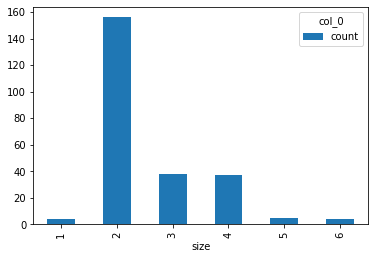

In [24]:
size.plot.bar()

In [27]:
pd.crosstab(index=tip['size'], columns = tip['tip'])

tip,1.00,1.01,1.10,1.17,1.25,1.32,1.36,1.44,1.45,1.47,...,5.65,5.85,5.92,6.00,6.50,6.70,6.73,7.58,9.00,10.00
size,,,,,,,,,,,,,,,,,,,,,
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,1,1,1,3,1,0,2,1,1,...,1,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,1,1,1,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
pd.crosstab(index=tip['size'], columns = tip['tip']).plot.bar()

<AxesSubplot:xlabel='size'>

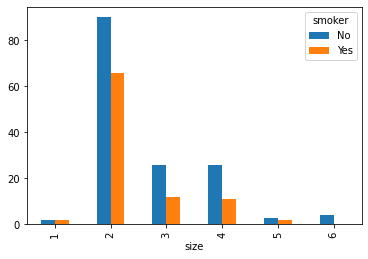

In [31]:
pd.crosstab(index=tip['size'], columns = tip['smoker']).plot.bar()

In [73]:
tip['tip_rate'] = (tip['tip']/tip['total_bill']) # 연관 파생변수 생성! 중요

In [33]:
tip.describe()

,total_bill,tip,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [74]:
top_tip = tip['tip_rate'] > 0.7

In [78]:
tip[top_tip]

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,1,1,3,1,2,0.710345


In [34]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   tip_rate    244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [35]:
tip.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


In [36]:
import pandas_profiling

In [37]:
tip.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
pd.crosstab(index=tip['tip'], columns = tip['size'])

size,1,2,3,4,5,6
tip,,,,,,
1.00,2,2,0,0,0,0
1.01,0,1,0,0,0,0
1.10,0,1,0,0,0,0
1.17,0,1,0,0,0,0
1.25,0,3,0,0,0,0
...,...,...,...,...,...,...
6.70,0,0,0,0,0,1
6.73,0,0,0,1,0,0
7.58,0,0,0,1,0,0


In [38]:
tip['sex'] = tip['sex'].replace({'Female':0,'Male':1})

In [39]:
tip.head()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,No,Sun,Dinner,2,0.059447
1,10.34,1.66,1,No,Sun,Dinner,3,0.160542
2,21.01,3.50,1,No,Sun,Dinner,3,0.166587
3,23.68,3.31,1,No,Sun,Dinner,2,0.139780
4,24.59,3.61,0,No,Sun,Dinner,4,0.146808


In [40]:
tip['smoker'] = tip['smoker'].replace({'No':0,'Yes':1})

In [42]:
tip['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [43]:
tip['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [44]:
tip['day'] = tip['day'].replace({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})

In [45]:
tip['time'] = tip['time'].replace({'Lunch': 0 , 'Dinner':1})

In [46]:
tip.head(3)

,total_bill,tip,sex,smoker,day,time,size,tip_rate
0,16.99,1.01,0,0,3,1,2,0.059447
1,10.34,1.66,1,0,3,1,3,0.160542
2,21.01,3.50,1,0,3,1,3,0.166587


In [47]:
tip.corr()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
total_bill,1.000000,0.675734,0.144877,0.085721,0.173693,0.183118,0.598315,-0.338624
tip,0.675734,1.000000,0.088862,0.005929,0.135499,0.121629,0.489299,0.342370
sex,0.144877,0.088862,1.000000,0.002816,0.230791,0.205231,0.086195,-0.069475
smoker,0.085721,0.005929,0.002816,1.000000,-0.032653,0.054921,-0.133178,0.030820
day,0.173693,0.135499,0.230791,-0.032653,1.000000,0.874366,0.165350,0.013493
time,0.183118,0.121629,0.205231,0.054921,0.874366,1.000000,0.103411,-0.033914
size,0.598315,0.489299,0.086195,-0.133178,0.165350,0.103411,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.069475,0.030820,0.013493,-0.033914,-0.142860,1.000000


In [48]:
tip.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [62]:
tip.groupby('day').count()

,total_bill,tip,sex,smoker,time,size,tip_rate
day,,,,,,,
0,62,62,62,62,62,62,62
1,19,19,19,19,19,19,19
2,87,87,87,87,87,87,87
3,76,76,76,76,76,76,76


In [79]:
import seaborn as sns

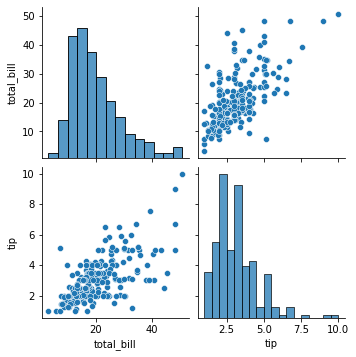

In [80]:
sns.pairplot(tip.loc[:,['total_bill','tip']])

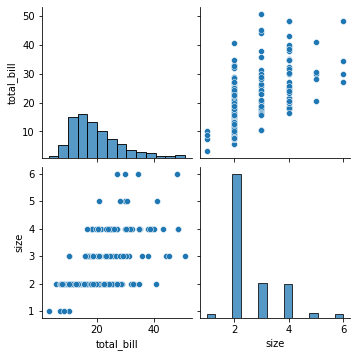

In [81]:
sns.pairplot(tip.loc[:,['total_bill','size']])

In [82]:
tip['avg_fee'] = tip['total_bill'] / tip['size'] 

In [86]:
tip.corr().iloc[0,:]

total_bill    1.000000
tip           0.675734
sex           0.144877
smoker        0.085721
day           0.173693
time          0.183118
size          0.598315
tip_rate     -0.338624
avg_fee       0.647497
Name: total_bill, dtype: float64

In [103]:
tip.groupby([tip['day'],tip['size']]).count()

total_bill  tip  sex  smoker  time  tip_rate  avg_fee
day size                                                       
0   1              1    1    1       1     1         1        1
    2             48   48   48      48    48        48       48
    3              4    4    4       4     4         4        4
    4              5    5    5       5     5         5        5
    5              1    1    1       1     1         1        1
    6              3    3    3       3     3         3        3
1   1              1    1    1       1     1         1        1
    2             16   16   16      16    16        16       16
    3              1    1    1       1     1         1        1
    4              1    1    1       1     1         1        1
2   1              2    2    2       2     2         2        2
    2             53   53   53      53    53        53       53
    3             18   18   18      18    18        18       18
    4             13   13   13      13    13        13       13
    5              1    1    1       1     1         1        1
3   2             39   39   39      39    39        39       39
    3             15   15   15      15    15        15       15
    4             18   18   18      18    18        18       18
    5              3    3    3       3     3         3        3
    6              1    1    1       1     1         1        1